<a href="https://colab.research.google.com/github/nmningmei/LevelUpPythonTutorial/blob/master/30_1_one_sample_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

# Let's make some random data

## normal distribution data, mean = 0.52, std = 0.06, sample size = 25

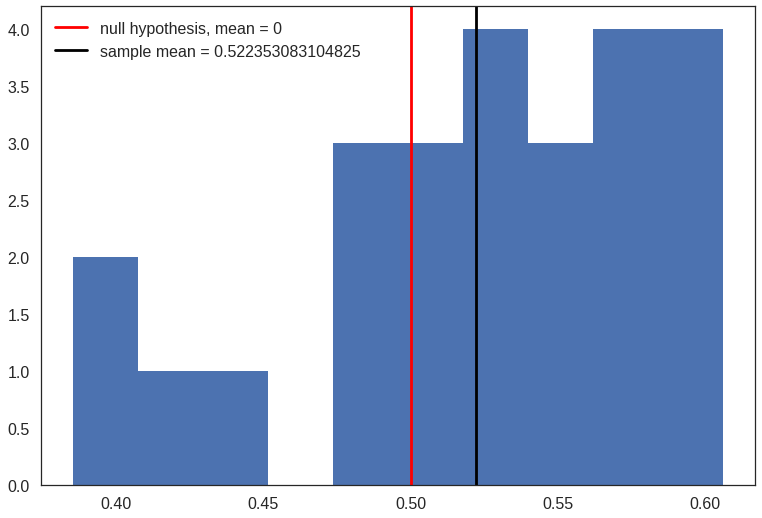

In [0]:
np.random.seed(1234)
data_normal = np.random.normal(0.52, 0.06, size=25)
_=plt.hist(data_normal)
_=plt.axvline(0.5,color='red',label='null hypothesis, mean = 0')
_=plt.axvline(np.mean(data_normal),color='black',label=f'sample mean = {np.mean(data_normal)}')
_=plt.legend()

## parametric one sample t test with scipy

In [0]:
stats.ttest_1samp(data_normal,0.5,)

Ttest_1sampResult(statistic=1.8041617508797758, pvalue=0.08377225792666645)

## nonparametric one sample t test (wilcox) with scipy 

In [0]:
stats.wilcoxon(data_normal-0.5,correction=True)

WilcoxonResult(statistic=95.0, pvalue=0.07142542948962949)

## nonparametric one sample t

In [0]:
def resample_ttest(x,baseline = 0.5,n_ps = 200,n_permutation = 1000,one_tail = False):
    """
    http://www.stat.ucla.edu/~rgould/110as02/bshypothesis.pdf
    Inputs:
    ----------
    x: numpy array vector, the data that is to be compared
    baseline: the single point that we compare the data with
    n_ps: number of p values we want to estimate
    n_permutation: number of permutation we want to perform, the more the further it could detect the strong effects, but it is so unnecessary
    one_tail: whether to perform one-tailed comparison
    """
    experiment      = np.mean(x) # the mean of the observations in the experiment
    experiment_diff = x - np.mean(x) + baseline # shift the mean to the baseline but keep the distribution
    # newexperiment = np.mean(experiment_diff) # just look at the new mean and make sure it is at the baseline
    # simulate/bootstrap null hypothesis distribution
    # 1st-D := number of sample same as the experiment
    # 2nd-D := within one permutation resamping, we perform resampling same as the experimental samples,
    # but also repeat this one sampling n_permutation times
    # 3rd-D := repeat 2nd-D n_ps times to obtain a distribution of p values later
    temp            = np.random.choice(experiment_diff,size=(x.shape[0],n_permutation,n_ps),replace=True)
    temp            = temp.mean(0)# take the mean over the sames because we only care about the mean of the null distribution
    # along each row of the matrix (n_row = n_permutation), we count instances that are greater than the observed mean of the experiment
    # compute the proportion, and we get our p values
    
    if one_tail:
        ps = (np.sum(temp >= experiment,axis=0)+1.) / (n_permutation + 1.)
    else:
        ps = (np.sum(np.abs(temp) >= np.abs(experiment),axis=0)+1.) / (n_permutation + 1.)
    return ps

In [0]:
ps = resample_ttest(data_normal,0.5)

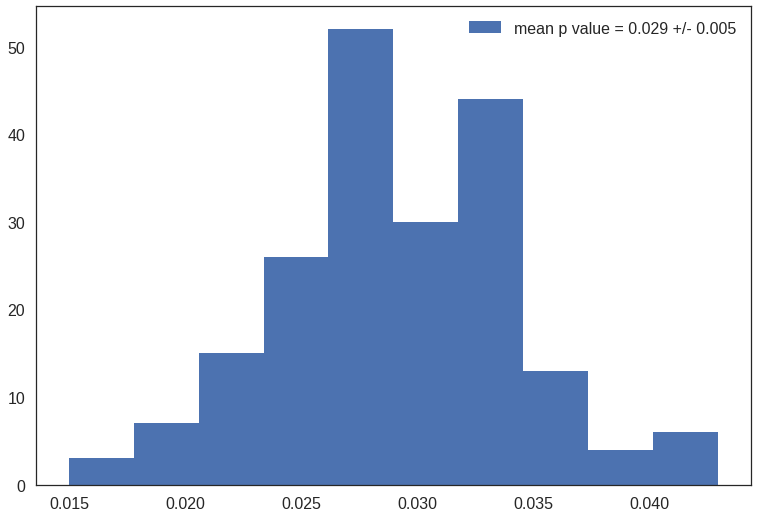

In [0]:
plt.hist(ps,label = "mean p value = {:.3f} +/- {:.3f}".format(ps.mean(),ps.std()))
plt.legend()

# now let's do the extract same thing with data from different distributions

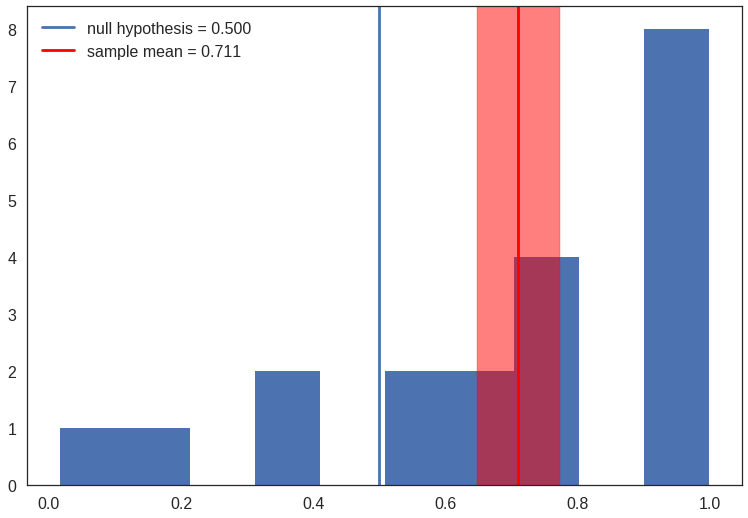

In [0]:
# make beta distributed data whose mean is close to 0
np.random.seed(12345)
data = np.random.beta(0.8,0.5,size=20)
_=plt.hist(data)
_=plt.axvline(0.5,label='null hypothesis = {:.3f}'.format(0.5))
_=plt.axvline(np.mean(data),color='red',label='sample mean = {:.3f}'.format(np.mean(data)))
_=plt.axvspan(np.mean(data)-np.std(data)/np.sqrt(data.size),
             np.mean(data)+np.std(data)/np.sqrt(data.size),
             color='red',alpha=0.5)
_=plt.legend()

In [0]:
stats.ttest_1samp(data,0.5)

Ttest_1sampResult(statistic=3.2821710832841613, pvalue=0.00391959284293493)

In [0]:
stats.wilcoxon(data-0.5)

WilcoxonResult(statistic=36.0, pvalue=0.009996388475979442)

(array([195.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.]),
 array([0.000999  , 0.00104895, 0.0010989 , 0.00114885, 0.0011988 ,
        0.00124875, 0.0012987 , 0.00134865, 0.0013986 , 0.00144855,
        0.0014985 , 0.00154845, 0.0015984 , 0.00164835, 0.0016983 ,
        0.00174825, 0.0017982 , 0.00184815, 0.0018981 , 0.00194805,
        0.001998  ]),
 <a list of 20 Patch objects>)

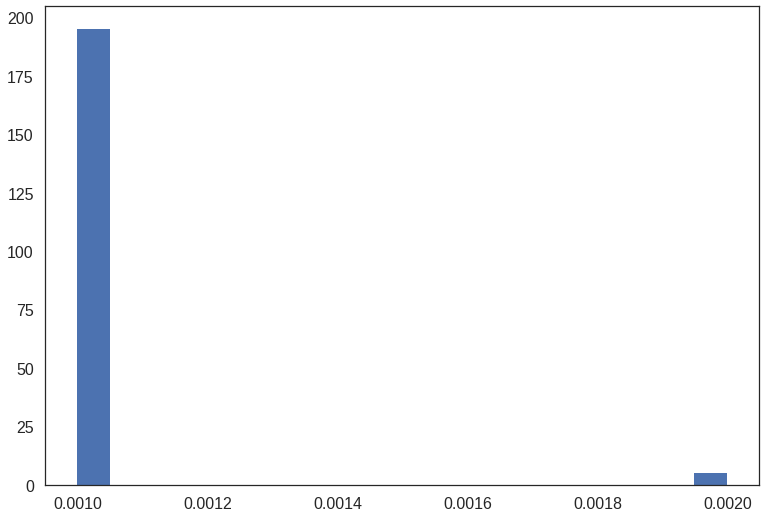

In [0]:
ps = resample_ttest(data,0.5)
plt.hist(ps,bins = 20)